In [3]:
# Move to Homomers folder
!pwd
%cd ../Homomers/

/mnt/c/Users/laura/SMTB18/SMTB18_Project/Data/Heteromers
/mnt/c/Users/laura/SMTB18/SMTB18_Project/Data/Homomers


# Bash pipeline

In [4]:
ls

1a3n.pdb*  3peu.pdb*           P01588.fasta*  P29295.fasta*  protList.tab*
1eer.pdb*  3zhe.pdb*           P13804.blast*  P54784.blast*  Q9XV58.blast*
1efv.pdb*  5cy3.pdb*           P13804.fasta*  P54784.fasta*  Q9XV58.fasta*
1zhi.pdb*  blast_protList.sh*  P18956.fasta*  P68871.blast*
2e0x.pdb*  G5ECF1.blast*       P20449.blast*  P68871.fasta*
3a7a.pdb*  G5ECF1.fasta*       P20449.fasta*  PoA6T9.blast*
3nvo.pdb*  P01588.blast*       P29295.blast*  PoA6T9.fasta*


In [13]:
# Retreive protein sequence
!python3 ../../Scripts/01.getSequences.py protList.tab

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
https://files.rcsb.org/download/5cy3.pdb
-1 / unknownhttps://files.rcsb.org/download/3peu.pdb
-1 / unknownhttps://files.rcsb.org/download/1zhi.pdb
-1 / unknownhttps://files.rcsb.org/download/1A3N.pdb
-1 / unknownhttps://files.rcsb.org/download/1eer.pdb
-1 / unknownhttps://files.rcsb.org/download/1EFV.pdb
-1 / unknownhttps://files.rcsb.org/download/2E0X.pdb
-1 / unknownhttps://files.rcsb.org/download/3a7a.pdb
-1 / unknownhttps://files.rcsb.org/download/3Zhe.pdb
-1 / unknownhttps://files.rcsb.org/download/3NVO.pdb
-1 / unknownP29295
https://www.uniprot.org/uniprot/P29295.fasta
100% [..............................................................] 642 / 642P20449
https://www.uniprot.org/uniprot/P20449.fasta
100% [..............................................................] 630 / 630P54784
https://www.uniprot.org/unip

In [14]:
# Write the blast code
!python3 ../../Scripts/02.getBLAST.py protList.tab

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [5]:
# Run blast code  
!bash blast_protList.sh

In [9]:
!bash ../../Scripts/runMAFFT.sh

B3GWA1
B3GWA1.fst

##### atgcfreq = 0.259344
nseq =  82
distance =  ktuples
iterate =  2
cycle =  2
sparsepickup = 0
nguidetree = 2
nthread = 0
sueff_global = 0.100000
done.
scoremtx = 1
charsize=128
Gap Penalty = -1.53, +0.00, +0.00

tuplesize = 6, dorp = p


Making a distance matrix ..
    1 / 82
done.

Constructing a UPGMA tree ... 
   80 / 82
done.

Progressive alignment 1/2... 
STEP    81 / 81 d
done.

Making a distance matrix from msa.. 
   80 / 82
done.

Constructing a UPGMA tree ... 
   80 / 82
done.

Progressive alignment 2/2... 
STEP    81 / 81 d
done.

disttbfast (aa) Version 7.271 alg=A, model=BLOSUM62, 1.53, -0.00, -0.00, noshift, amax=0.0
0 thread(s)
maxdist = 2
nthread = 0
done.
scoremtx = 1
charsize=128
dndpre (aa) Version 7.271 alg=X, model=BLOSUM62, 1.53, +0.12, -0.00, noshift, amax=0.0
0 thread(s)
minimumweight = 0.000500
autosubalignment = 0.000000
nthread = 0
randomseed = 0
blosum 62 / kimura 200
poffset = 0
niter = 2
sueff_global = 0.100000
done.
scoremtx = 1
char

In [10]:
!bash ../../Scripts/runClean.sh 

B3GWA1
B3GWA1.alm
O75874
O75874.alm
P02766
P02766.alm
P0A6C8
P0A6C8.alm
P32325
P32325.alm
P57743
P57743.alm
Traceback (most recent call last):
  File "../../Scripts/04.cleanAligment.py", line 13, in <module>
    alig = readAlig(inputFile, 'fasta')
  File "/mnt/c/Users/laura/SMTB18/SMTB18_Project/Scripts/functions.py", line 61, in readAlig
    alignment = AlignIO.read(open(file), form)
  File "/usr/local/lib/python3.5/dist-packages/Bio/AlignIO/__init__.py", line 439, in read
    raise ValueError("No records found in handle")
ValueError: No records found in handle
POAFX9
POAFX9.alm
Traceback (most recent call last):
  File "../../Scripts/04.cleanAligment.py", line 15, in <module>
    toDel = findGaps(alig, code)
  File "/mnt/c/Users/laura/SMTB18/SMTB18_Project/Scripts/functions.py", line 24, in findGaps
    seq = alig[name]
KeyError: 'POAFX9'
Q06592
Q06592.alm


In [14]:
!bash ../../Scripts/runShannons.sh

B3GWA1
B3GWA1.aln
O75874
O75874.aln
P02766
P02766.aln
P0A6C8
P0A6C8.aln
P32325
P32325.aln
Q06592
Q06592.aln


In [25]:
!bash ../../Scripts/runRate.sh

B3GWA1
B3GWA1.aln
O75874
O75874.aln
P02766
P02766.aln
P0A6C8
P0A6C8.aln
P32325
P32325.aln
Q06592
Q06592.aln


# Analysis of results

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


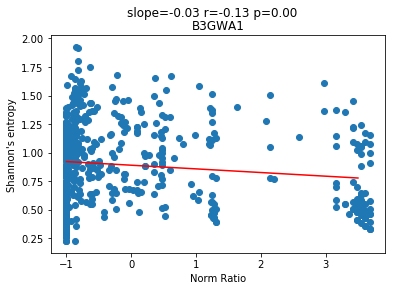

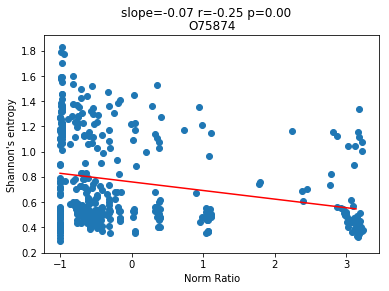

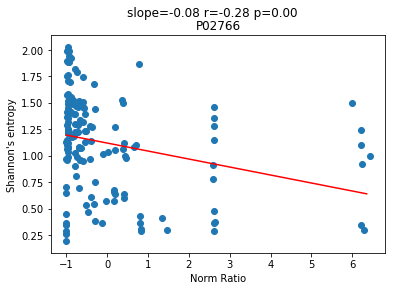

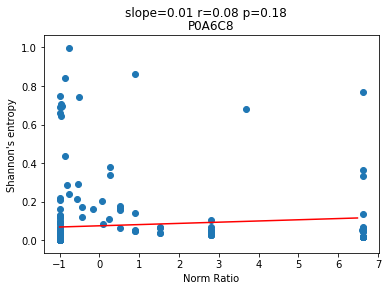

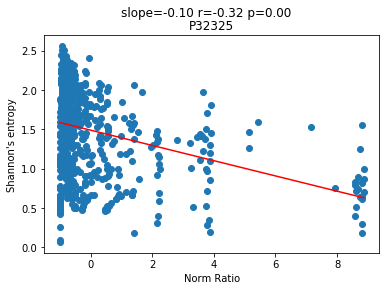

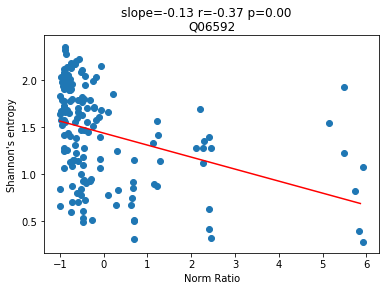

In [93]:
code = 'B3GWA1'

for code in ('B3GWA1', 'O75874', 'P02766', 'P0A6C8', 'P32325', 'Q06592'):
    shan = pd.read_table(code+'.shannon')
    rate = pd.read_table(code+'.rate')
    # X norm
    x = rate["norm"]
    # Y shann
    y = shan["entropy"]
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    lx = np.arange(start=min(x), stop=max(x), step=len(x)/1000)
    ly = tuple(slope*i + intercept for i in lx)
    plt.scatter(x,y)
    plt.plot(lx, ly, color='red')
    plt.title(code)
    plt.suptitle('slope=%.2f r=%.2f p=%.2f'%(slope, r_value, p_value))
    plt.xlabel('Norm Ratio')
    plt.ylabel("Shannon's entropy")
    plt.show()

In [79]:
lx

array([-1.   , -0.844, -0.688, -0.532, -0.376, -0.22 , -0.064,  0.092,
        0.248,  0.404,  0.56 ,  0.716,  0.872,  1.028,  1.184,  1.34 ,
        1.496,  1.652,  1.808,  1.964,  2.12 ,  2.276,  2.432,  2.588,
        2.744,  2.9  ,  3.056,  3.212,  3.368,  3.524,  3.68 ,  3.836,
        3.992,  4.148,  4.304,  4.46 ,  4.616,  4.772,  4.928,  5.084,
        5.24 ,  5.396,  5.552,  5.708,  5.864])

In [75]:
shan = pd.read_table(code+'.shannon')
shan.head()

,pos,entropy
0,1,0.660228
1,2,1.275294
2,3,1.278372
3,4,1.578962
4,5,1.559164


In [76]:
rate = pd.read_table(code+'.rate')
rate.head()

,cons,rad,ratio,norm
0,1431,0,0.000000,-1.000000
1,1606,285,5.635088,-0.453589
2,2080,65,32.000000,2.102905
3,1332,1443,0.923077,-0.910493
4,1575,1275,1.235294,-0.880219


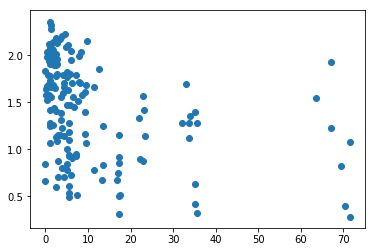

In [77]:
# X norm
x = rate["ratio"]
# Y shann
y = shan["entropy"]
plt.scatter(x,y)

In [67]:
d = {'pos': shan['pos'], 'norm': rate['norm'], 'entropy': shan['entropy']}
df = pd.DataFrame(data=d)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
slope, p_value

(-0.012405513810027607, 2.3329893338469653e-06)

In [64]:
import numpy as np
from scipy import stats

In [60]:
df.head()

,entropy,norm,pos
0,0.660228,-1.000000,1
1,1.275294,-0.453589,2
2,1.278372,2.102905,3
3,1.578962,-0.910493,4
4,1.559164,-0.880219,5


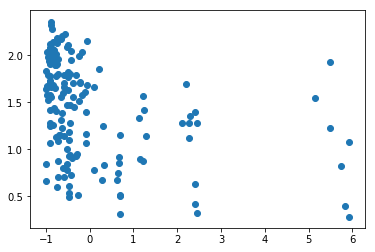

In [55]:
plt.scatter(df['norm'], df['entropy'])